In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
insta_data = pd.read_pickle(os.path.join('insta_data_2'))

In [3]:
insta_data.head()

user_id  gender       state  age date_joined  n_dependants fam_status  \
0    26711  Female    Missouri   48    1/1/2017             3    married   
1    26711  Female    Missouri   48    1/1/2017             3    married   
2    26711  Female    Missouri   48    1/1/2017             3    married   
3    33890  Female  New Mexico   36    1/1/2017             0     single   
4    33890  Female  New Mexico   36    1/1/2017             0     single   

   income  Unnamed: 0  Unnamed: 0.1  ...    price_range_loc     Busiest_day  \
0  165665       97126     4206418.0  ...  Mid-range product  Regularly busy   
1  165665       97127     4206422.0  ...  Mid-range product  Regularly busy   
2  165665       97128     4206426.0  ...  Mid-range product  Regularly busy   
3   59285       98470     5334165.0  ...  Mid-range product  Regularly busy   
4   59285       98471     5334176.0  ...  Mid-range product  Regularly busy   

     Busiest_days  Busiest_period_of_day  max_order  loyalty_flag  \
0    Busiest days            Most Orders        8.0  New customer   
1  Regularly days            Most Orders        8.0  New customer   
2    Busiest days            Most Orders        8.0  New customer   
3  Regularly days            Most Orders        5.0  New customer   
4    Busiest days         Average Orders        5.0  New customer   

   the_spender_flag         frequency_flag   Region         activity  
0       Low spender  Non-Frequent customer  Midwest  normal_activity  
1       Low spender  Non-Frequent customer  Midwest  normal_activity  
2       Low spender  Non-Frequent customer  Midwest  normal_activity  
3       Low spender  Non-Frequent customer     West  normal_activity  
4       Low spender  Non-Frequent customer     West  normal_activity  

[5 rows x 35 columns]

##### QUESTION 5.

###### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

#####    QUESTION 6.

#####    Create an appropriate visualization to show the distribution of profiles.


#####   Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

######   Age Profile 

In [4]:
insta_data.loc[insta_data['age']<=25, 'age_group']='Young Adult'
insta_data.loc[(insta_data['age']<65)&(insta_data['age']>25),'age_group']='Adult'
insta_data.loc[insta_data['age']>=65,'age_group']='Senior'

In [5]:
insta_data['age_group'].value_counts()

Adult          560743
Senior         243672
Young Adult    116855
Name: age_group, dtype: int64

In [6]:
insta_data.head()

user_id  gender       state  age date_joined  n_dependants fam_status  \
0    26711  Female    Missouri   48    1/1/2017             3    married   
1    26711  Female    Missouri   48    1/1/2017             3    married   
2    26711  Female    Missouri   48    1/1/2017             3    married   
3    33890  Female  New Mexico   36    1/1/2017             0     single   
4    33890  Female  New Mexico   36    1/1/2017             0     single   

   income  Unnamed: 0  Unnamed: 0.1  ...     Busiest_day    Busiest_days  \
0  165665       97126     4206418.0  ...  Regularly busy    Busiest days   
1  165665       97127     4206422.0  ...  Regularly busy  Regularly days   
2  165665       97128     4206426.0  ...  Regularly busy    Busiest days   
3   59285       98470     5334165.0  ...  Regularly busy  Regularly days   
4   59285       98471     5334176.0  ...  Regularly busy    Busiest days   

   Busiest_period_of_day  max_order  loyalty_flag  the_spender_flag  \
0            Most Orders        8.0  New customer       Low spender   
1            Most Orders        8.0  New customer       Low spender   
2            Most Orders        8.0  New customer       Low spender   
3            Most Orders        5.0  New customer       Low spender   
4         Average Orders        5.0  New customer       Low spender   

          frequency_flag   Region         activity age_group  
0  Non-Frequent customer  Midwest  normal_activity     Adult  
1  Non-Frequent customer  Midwest  normal_activity     Adult  
2  Non-Frequent customer  Midwest  normal_activity     Adult  
3  Non-Frequent customer     West  normal_activity     Adult  
4  Non-Frequent customer     West  normal_activity     Adult  

[5 rows x 36 columns]

In [7]:
insta_data.groupby('age_group').agg({'max_order': ['mean', 'min', 'max']})

max_order           
                  mean  min   max
age_group                        
Adult        33.220745  5.0  99.0
Senior       32.966832  5.0  99.0
Young Adult  33.362338  5.0  99.0

In [8]:
insta_data.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.743126  1.0  24.5
Senior       7.712845  1.0  24.5
Young Adult  7.746541  1.0  24.5

####     Age profile visualization

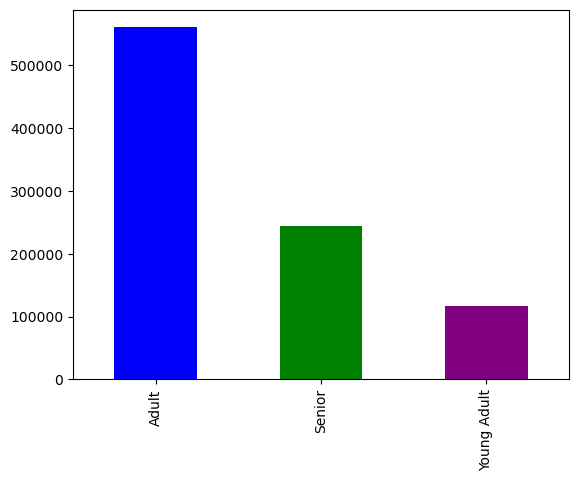

In [9]:
bar = insta_data['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple'])

######     Safe bar chart

In [10]:
bar.figure.savefig(os.path.join('bar_agegroup.png'))

####      Income Profile

In [11]:
insta_data.loc[insta_data['income']<40000, 'income_group']='low income'
insta_data.loc[(insta_data['income']>=40000)&(insta_data['income']<150000),'income_group']='middle income'
insta_data.loc[insta_data['income']>150000, 'income_group']='high income'

In [12]:
insta_data.head()

user_id  gender       state  age date_joined  n_dependants fam_status  \
0    26711  Female    Missouri   48    1/1/2017             3    married   
1    26711  Female    Missouri   48    1/1/2017             3    married   
2    26711  Female    Missouri   48    1/1/2017             3    married   
3    33890  Female  New Mexico   36    1/1/2017             0     single   
4    33890  Female  New Mexico   36    1/1/2017             0     single   

   income  Unnamed: 0  Unnamed: 0.1  ...    Busiest_days  \
0  165665       97126     4206418.0  ...    Busiest days   
1  165665       97127     4206422.0  ...  Regularly days   
2  165665       97128     4206426.0  ...    Busiest days   
3   59285       98470     5334165.0  ...  Regularly days   
4   59285       98471     5334176.0  ...    Busiest days   

   Busiest_period_of_day  max_order  loyalty_flag  the_spender_flag  \
0            Most Orders        8.0  New customer       Low spender   
1            Most Orders        8.0  New customer       Low spender   
2            Most Orders        8.0  New customer       Low spender   
3            Most Orders        5.0  New customer       Low spender   
4         Average Orders        5.0  New customer       Low spender   

          frequency_flag   Region         activity  age_group   income_group  
0  Non-Frequent customer  Midwest  normal_activity      Adult    high income  
1  Non-Frequent customer  Midwest  normal_activity      Adult    high income  
2  Non-Frequent customer  Midwest  normal_activity      Adult    high income  
3  Non-Frequent customer     West  normal_activity      Adult  middle income  
4  Non-Frequent customer     West  normal_activity      Adult  middle income  

[5 rows x 37 columns]

#####     Frequency   Check 

In [13]:
insta_data['income_group'].value_counts()

middle income    751895
high income      118411
low income        50947
Name: income_group, dtype: int64

In [14]:
insta_data.groupby('income_group').agg({'max_order': ['mean', 'min', 'max']})

max_order           
                    mean  min   max
income_group                       
high income    33.864067  5.0  99.0
low income     30.783167  5.0  99.0
middle income  33.224433  5.0  99.0

In [15]:
insta_data.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
high income    7.889835  1.0  24.3
low income     7.061692  1.0  22.5
middle income  7.756846  1.0  24.5

#####    Income profile visualizstion

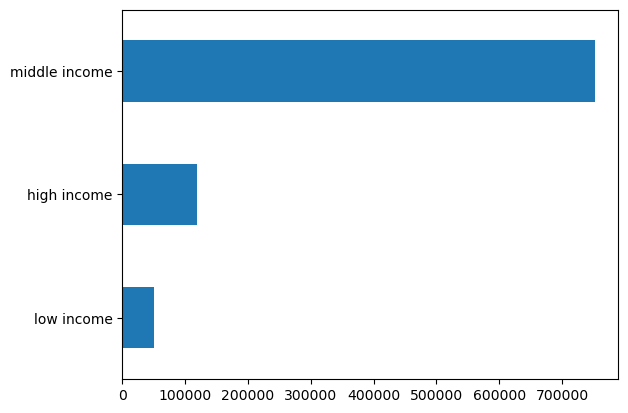

In [16]:
bar2 = insta_data['income_group'].value_counts().sort_values().plot.barh()

#####   Safe visualization 

In [17]:
bar2.figure.savefig(os.path.join('bar_incomegroup.png'))

####   Import department data

In [18]:
dept = pd.read_csv(os.path.join('dept_csv (1)'), index_col = False)

In [19]:
dept

Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing

####    Rename unnamed column to department_id

In [20]:
dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [21]:
dept.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

####  Turn department data into data dictionary

In [22]:
zipped = zip(dept['department_id'], dept['department'])
data_dict = dict(zipped)

In [23]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

####   Connect department _id to department

In [24]:
insta_data['department'] = insta_data['department_id'].map(data_dict)

In [25]:
insta_data.head()

user_id  gender       state  age date_joined  n_dependants fam_status  \
0    26711  Female    Missouri   48    1/1/2017             3    married   
1    26711  Female    Missouri   48    1/1/2017             3    married   
2    26711  Female    Missouri   48    1/1/2017             3    married   
3    33890  Female  New Mexico   36    1/1/2017             0     single   
4    33890  Female  New Mexico   36    1/1/2017             0     single   

   income  Unnamed: 0  Unnamed: 0.1  ...  Busiest_period_of_day  max_order  \
0  165665       97126     4206418.0  ...            Most Orders        8.0   
1  165665       97127     4206422.0  ...            Most Orders        8.0   
2  165665       97128     4206426.0  ...            Most Orders        8.0   
3   59285       98470     5334165.0  ...            Most Orders        5.0   
4   59285       98471     5334176.0  ...         Average Orders        5.0   

   loyalty_flag  the_spender_flag         frequency_flag   Region  \
0  New customer       Low spender  Non-Frequent customer  Midwest   
1  New customer       Low spender  Non-Frequent customer  Midwest   
2  New customer       Low spender  Non-Frequent customer  Midwest   
3  New customer       Low spender  Non-Frequent customer     West   
4  New customer       Low spender  Non-Frequent customer     West   

          activity  age_group   income_group department  
0  normal_activity      Adult    high income  beverages  
1  normal_activity      Adult    high income  beverages  
2  normal_activity      Adult    high income  beverages  
3  normal_activity      Adult  middle income  beverages  
4  normal_activity      Adult  middle income  beverages  

[5 rows x 38 columns]

####  Department baby_status profile

In [26]:
insta_data['baby_status'] = [1 if x == 'babies' else 0 for x in insta_data['department']]
insta_data['baby_status'] = insta_data.groupby(['user_id'])['baby_status'].transform(np.max)

#####    Order Frequency and expenditure check

In [27]:
insta_data['baby_status'].value_counts(dropna=False)

0    833559
1     87711
Name: baby_status, dtype: int64

In [28]:
insta_data.groupby('baby_status').agg({'max_order': ['mean', 'min', 'max']})

max_order           
                  mean  min   max
baby_status                      
0            32.054434  5.0  99.0
1            43.787986  5.0  99.0

In [29]:
insta_data.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
0            7.740044  1.0  24.5
1            7.692841  1.0  24.3

####   Baby_status visualization

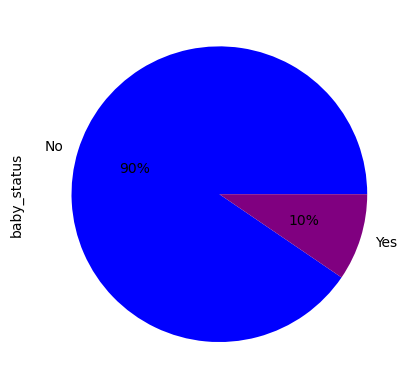

In [30]:
pie = insta_data['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','purple'])

In [31]:
pie.figure.savefig(os.path.join('pie_baby_status'))

####   Department alcohol_status

In [32]:
insta_data['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in insta_data['department']]
insta_data['alcohol_status'] = insta_data.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [33]:
insta_data['alcohol_status'].value_counts(dropna=False)

0    892226
1     29044
Name: alcohol_status, dtype: int64

#####     Order Frequency and expenditure check

In [34]:
insta_data.groupby('alcohol_status').agg({'max_order': ['mean', 'min', 'max']})

max_order           
                     mean  min   max
alcohol_status                      
0               33.075817  5.0  99.0
1               36.112312  5.0  99.0

In [35]:
insta_data.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
alcohol_status                     
0               7.747532  1.0  24.5
1               7.367460  1.0  24.3

#####    Alcohol_status visualization

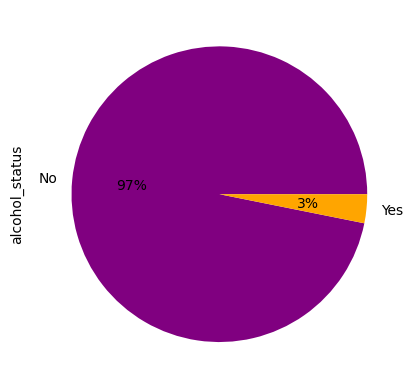

In [36]:
pie2 = insta_data['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['purple','orange'])

In [37]:
pie2.figure.savefig(os.path.join('pie_alcohol'))

####    Department Pet_status profile

In [38]:
insta_data['pet_status'] = [1 if x == 'pets' else 0 for x in insta_data['department']]
insta_data['pet_status']=insta_data.groupby(['user_id'])['pet_status'].transform(np.max)

In [39]:
insta_data['pet_status'].value_counts(dropna=False)

0    900566
1     20704
Name: pet_status, dtype: int64

######  Order Frequency and expenditure 

In [40]:
insta_data.groupby('pet_status').agg({'max_order': ['mean', 'min', 'max']})

max_order           
                 mean  min   max
pet_status                      
0           33.094609  5.0  99.0
1           36.518064  5.0  99.0

In [41]:
insta_data.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
0           7.726827  1.0  24.5
1           8.114963  1.0  23.8

#####    pet_status visualization

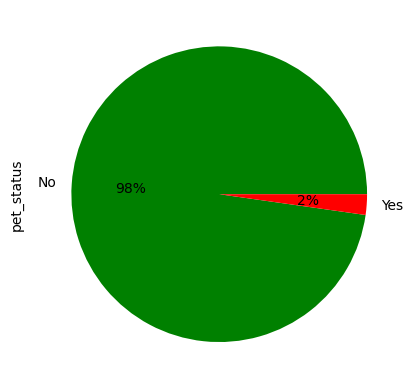

In [42]:
pie3 = insta_data['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','red'])

In [43]:
pie3.figure.savefig(os.path.join('pie_pets'))

#####   QUESTION 8.

#####   Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#####    QUESTION 9.

#####     Produce suitable charts to illustrate your results and export them in your project folder.

######   Create Crosstab for region and age group

In [44]:
age_region = pd.crosstab(insta_data['Region'], insta_data['age_group'], dropna = False)

In [45]:
insta_data.head()

user_id  gender       state  age date_joined  n_dependants fam_status  \
0    26711  Female    Missouri   48    1/1/2017             3    married   
1    26711  Female    Missouri   48    1/1/2017             3    married   
2    26711  Female    Missouri   48    1/1/2017             3    married   
3    33890  Female  New Mexico   36    1/1/2017             0     single   
4    33890  Female  New Mexico   36    1/1/2017             0     single   

   income  Unnamed: 0  Unnamed: 0.1  ...  the_spender_flag  \
0  165665       97126     4206418.0  ...       Low spender   
1  165665       97127     4206422.0  ...       Low spender   
2  165665       97128     4206426.0  ...       Low spender   
3   59285       98470     5334165.0  ...       Low spender   
4   59285       98471     5334176.0  ...       Low spender   

          frequency_flag   Region         activity  age_group   income_group  \
0  Non-Frequent customer  Midwest  normal_activity      Adult    high income   
1  Non-Frequent customer  Midwest  normal_activity      Adult    high income   
2  Non-Frequent customer  Midwest  normal_activity      Adult    high income   
3  Non-Frequent customer     West  normal_activity      Adult  middle income   
4  Non-Frequent customer     West  normal_activity      Adult  middle income   

   department  baby_status  alcohol_status pet_status  
0   beverages            0               0          0  
1   beverages            0               0          0  
2   beverages            0               0          0  
3   beverages            0               0          0  
4   beverages            0               0          0  

[5 rows x 41 columns]

In [46]:
age_region

age_group   Adult  Senior  Young Adult
Region                                
Midwest    131341   56536        27711
Northeast   98777   43946        20268
South      186758   80769        39260
West       143867   62421        29616

#####    Age_group visualization

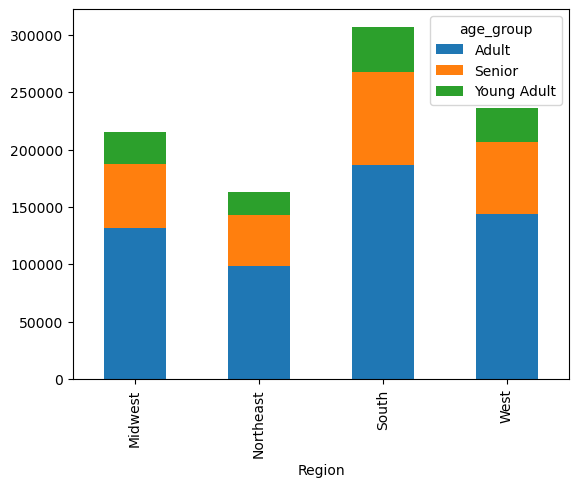

In [47]:
bar = age_region.plot(kind = 'bar', stacked =True)

In [48]:
bar.figure.savefig(os.path.join('bar_age_region'))

######   Create Crosstab for region and department

In [49]:
region_dep = pd.crosstab(insta_data['department'], insta_data['Region'], dropna = False)

In [50]:
region_dep

Region           Midwest  Northeast  South   West
department                                       
alcohol             1897       1623   2605   2051
babies              4488       3397   6430   4421
bakery              3230       2742   5004   3602
beverages          21484      17586  31477  23952
breakfast           6790       5421   9953   7567
bulk                 588        450    726    725
canned goods       14141      10456  20253  15583
dairy eggs         49241      35935  69091  53732
deli                5015       3621   7386   5238
dry goods pasta     6846       5003   9484   7283
frozen             23305      16920  32921  24784
household           9545       7242  13526  10175
international       2853       2034   3925   3151
meat seafood        3197       2435   4300   3504
missing              271        210    408    237
other                163        128    202    164
pantry             14549      11108  21053  16454
personal care       3578       2527   4872   3603
pets                1286       1031   1460   1150
produce            26440      19728  37453  29793
snacks             16681      13394  24258  18735

In [51]:
region_dep.to_clipboard()

######    Region_dep visualization

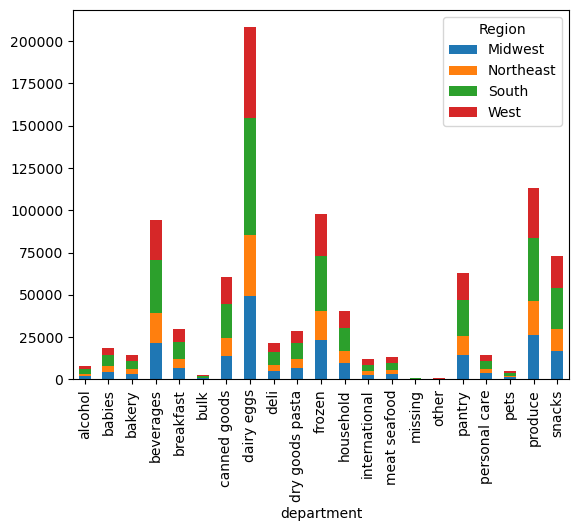

In [52]:
bar = region_dep.plot(kind='bar', stacked =True)

In [53]:
bar.figure.savefig(os.path.join('bar_region_dep'))

#####    Crosstab for Region and price_range_loc

In [54]:
region_price_range = pd.crosstab(insta_data['Region'], insta_data['price_range_loc'], dropna = False)

In [55]:
region_price_range

price_range_loc  High-range product  Low-range product  Mid-range product
Region                                                                   
Midwest                          29              72683             142876
Northeast                        22              55634             107335
South                            35             102739             204013
West                             45              79965             155894

In [56]:
region_price_range.to_clipboard()

######     region_price_range visualization

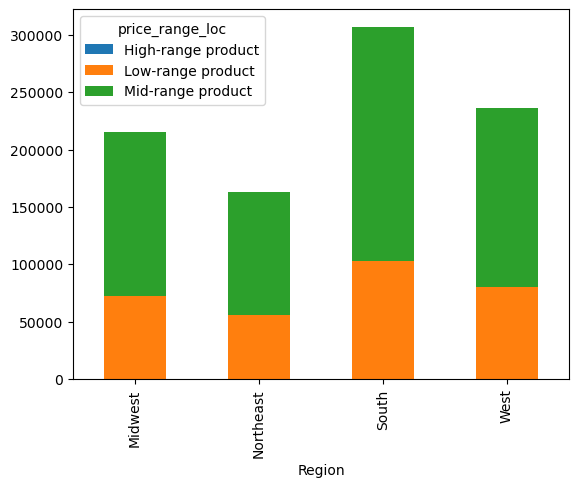

In [57]:
bar = region_price_range.plot(kind='bar', stacked =True)

In [58]:
bar.figure.savefig(os.path.join('bar_region_pr'))

In [59]:
income_freq = pd.crosstab(insta_data['income_group'], insta_data['frequency_flag'], dropna = False)

In [60]:
income_freq

frequency_flag  Frequent customer  Non-Frequent customer  Regular customer
income_group                                                              
high income                 15552                  66831             36028
low income                   7425                  27732             15790
middle income              103635                 423182            225078

In [116]:
income_freq.to_clipboard()

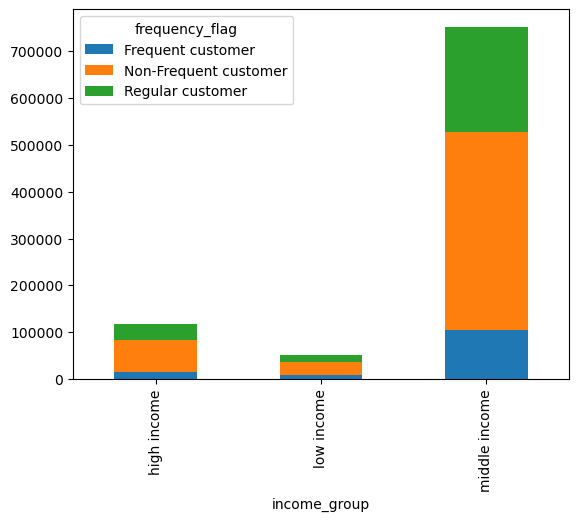

In [62]:
bar = income_freq.plot(kind = 'bar', stacked =True)

In [63]:
bar.figure.savefig(os.path.join('bar_income_frq'))

#####   crosstab for age group and frequency

In [64]:
age_freq = pd.crosstab(insta_data['age_group'], insta_data['frequency_flag'], dropna = False)

In [65]:
age_freq

frequency_flag  Frequent customer  Non-Frequent customer  Regular customer
age_group                                                                 
Adult                       76831                 315797            168115
Senior                      34069                 135492             74111
Young Adult                 15712                  66461             34682

######       age_freq Region Price Range Bar Chart visualization

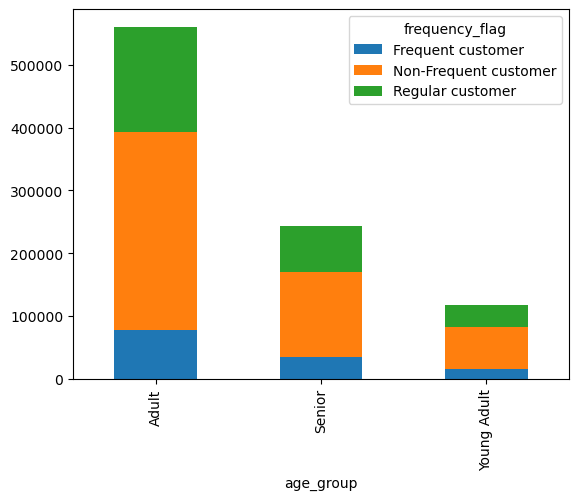

In [66]:
bar = age_freq.plot(kind = 'bar', stacked = True)

In [67]:
bar.figure.savefig(os.path.join('bar_age_frq'))

######    crosstab for fam_status

In [68]:
fam_status_freq = pd.crosstab(insta_data['fam_status'], insta_data['frequency_flag'], dropna = False)

In [69]:
fam_status_freq

frequency_flag                    Frequent customer  Non-Frequent customer  \
fam_status                                                                   
divorced/widowed                              10889                  42886   
living with parents and siblings               6368                  25185   
married                                       88876                 364319   
single                                        20479                  85360   

frequency_flag                    Regular customer  
fam_status                                          
divorced/widowed                             24842  
living with parents and siblings             13197  
married                                     192007  
single                                       46862

######  frequency_flag Bar Chart visualization

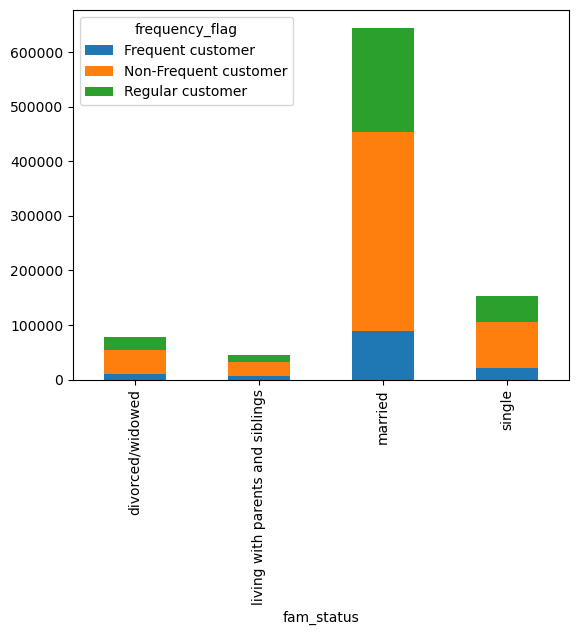

In [70]:
bar = fam_status_freq.plot(kind='bar', stacked =True)

In [71]:
bar.figure.savefig(os.path.join('bar_fam_status'))

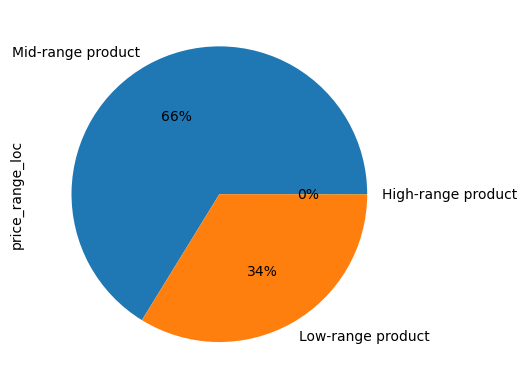

In [72]:
pie = insta_data['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'))

In [73]:
bar.figure.savefig(os.path.join('bar_price_range_loc'))

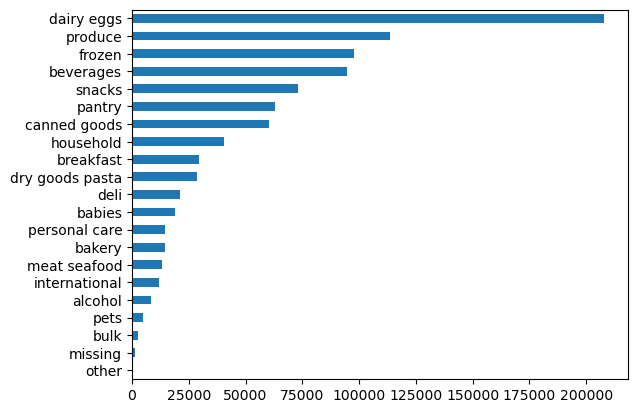

In [74]:
Bar = insta_data.department.value_counts().sort_values().plot(kind = 'barh')

In [75]:
bar.figure.savefig(os.path.join('bar_departments'))

####                                                                 Part Two

In [76]:
dep_freq = pd.crosstab(insta_data['department'], insta_data['frequency_flag'], dropna = False)

In [77]:
dep_freq

frequency_flag   Frequent customer  Non-Frequent customer  Regular customer
department                                                                 
alcohol                       1206                   4421              2549
babies                        2836                   9588              6312
bakery                        1932                   8566              4080
beverages                    12816                  52460             29223
breakfast                     3971                  16651              9109
bulk                           548                   1052               889
canned goods                  8971                  33656             17806
dairy eggs                   23680                 122374             61945
deli                          2465                  12390              6405
dry goods pasta               4095                  16273              8248
frozen                       12718                  56285             28927
household                     5778                  23165             11545
international                 1989                   6295              3679
meat seafood                  1693                   8073              3670
missing                        257                    477               392
other                          128                    309               220
pantry                       11004                  33088             19072
personal care                 2342                   7910              4328
pets                           513                   2955              1459
produce                      16625                  61613             35176
snacks                       11045                  40149             21874

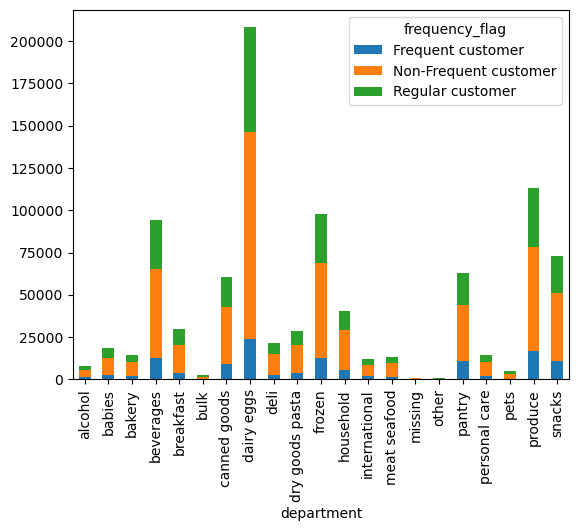

In [78]:
bar = dep_freq.plot(kind='bar', stacked =True)

In [79]:
bar.figure.savefig(os.path.join('bar_dept_frequency'))

######     Sales frequency

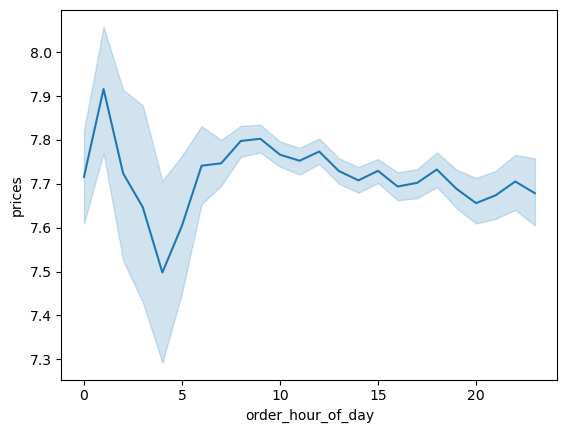

In [80]:
line = sns.lineplot(data = insta_data, x = 'order_hour_of_day',y = 'prices')

In [81]:
line.figure.savefig(os.path.join('order_hour_of_week_line'))

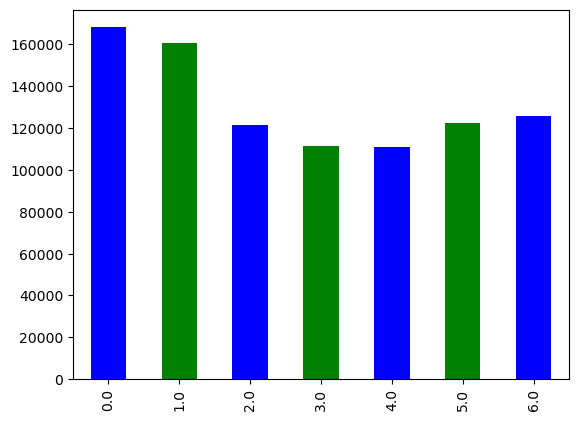

In [82]:
bar = insta_data['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue','green'])

In [83]:
#insta_data.loc[insta_data['order_hour_of_week'] > 25]

In [84]:
bar.figure.savefig(os.path.join('order_day_of_week_bar'))

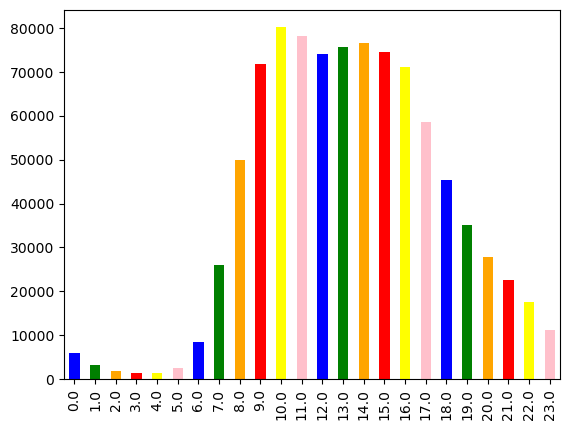

In [85]:
bar = insta_data['order_hour_of_day'].value_counts().sort_index().plot.bar(color = ['blue','green','orange','red','yellow','pink'])

In [86]:
bar.figure.savefig(os.path.join('order_hour_day_bar'))

In [87]:
insta_data['price_range_loc'].value_counts()

Mid-range product     610118
Low-range product     311021
High-range product       131
Name: price_range_loc, dtype: int64

In [88]:
products = pd.crosstab(insta_data['department'], insta_data['price_range_loc'], dropna = False)

In [89]:
products

price_range_loc  High-range product  Low-range product  Mid-range product
department                                                               
alcohol                           0               6336               1840
babies                            0               2393              16343
bakery                            0               2332              12246
beverages                         0              15452              79047
breakfast                         0               5923              23808
bulk                              0                  0               2489
canned goods                      0              27327              33106
dairy eggs                        0              55555             152444
deli                              0               6277              14983
dry goods pasta                   0              15071              13545
frozen                            0              50485              47445
household                         0               7741              32747
international                     0               5521               6442
meat seafood                    131                  0              13305
missing                           0                 69               1057
other                             0                 29                628
pantry                            0              10192              52972
personal care                     0               2365              12215
pets                              0               1679               3248
produce                           0              46897              66517
snacks                            0              49377              23691

In [90]:
products.to_clipboard()

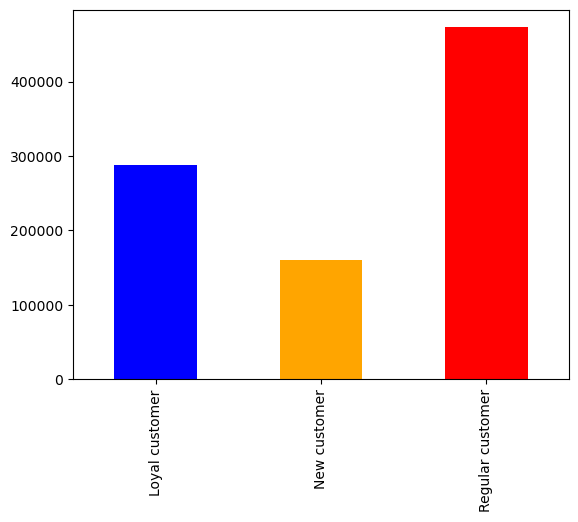

In [91]:
bar = insta_data['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['blue','orange','red'])

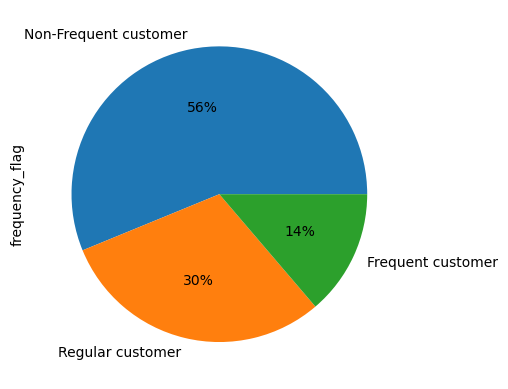

In [92]:
pie = insta_data['frequency_flag'].value_counts().plot.pie(autopct=('%1.f%%'))

In [93]:
order_habit = pd.crosstab(insta_data['department'], insta_data['loyalty_flag'], dropna = False)

In [94]:
order_habit

loyalty_flag     Loyal customer  New customer  Regular customer
department                                                     
alcohol                    1921          1759              4496
babies                     7665          2303              8768
bakery                     4186          2762              7630
beverages                 29494         16391             48614
breakfast                  9181          5288             15262
bulk                        877           391              1221
canned goods              16496         11887             32050
dairy eggs                71964         31765            104270
deli                       6175          3897             11188
dry goods pasta            7618          5751             15247
frozen                    28028         18705             51197
household                 11045          8171             21272
international              3469          2172              6322
meat seafood               2927          3189              7320
missing                     387           216               523
other                       208           124               325
pantry                    18787         11452             32925
personal care              3691          3104              7785
pets                       1356           966              2605
produce                   39122         17551             56741
snacks                    23320         12439             37309

In [95]:
order_habit.to_clipboard()

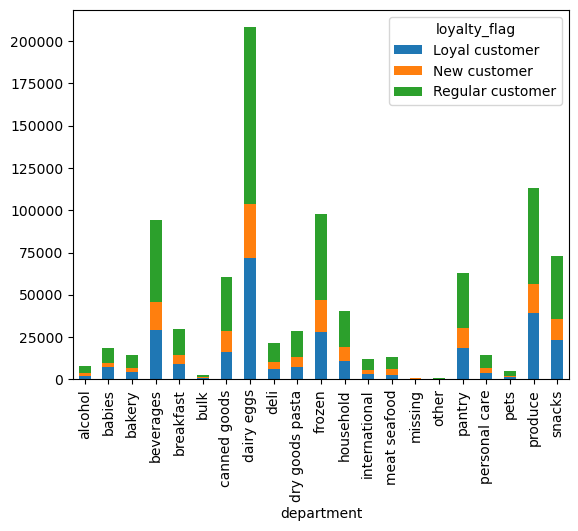

In [96]:
bar = order_habit.plot(kind='bar', stacked =True)

<AxesSubplot:xlabel='income', ylabel='age'>

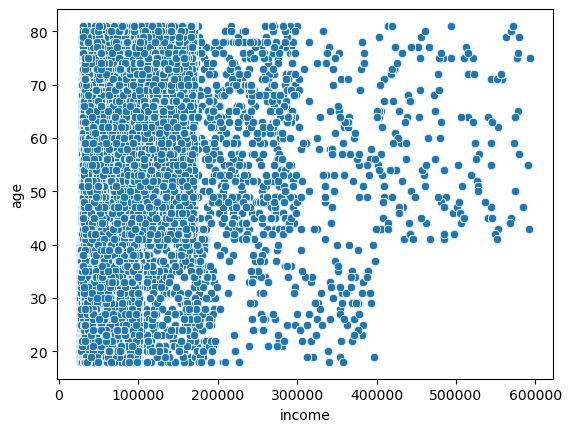

In [97]:
sns.scatterplot(x = 'income', y = 'age',data = insta_data)

<AxesSubplot:xlabel='order_number', ylabel='prices'>

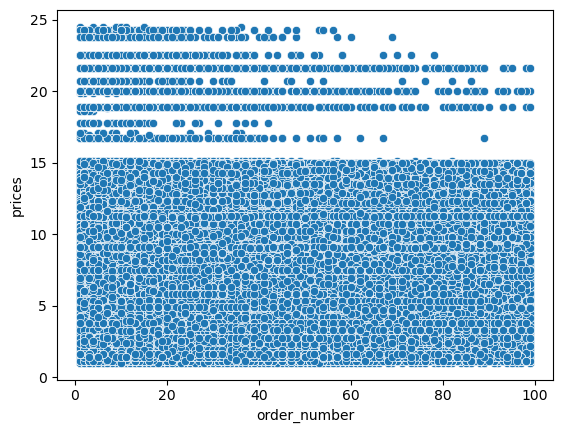

In [98]:
sns.scatterplot(x = 'order_number', y = 'prices',data = insta_data)

In [99]:
income_region = pd.crosstab(insta_data['income_group'], insta_data['Region'], dropna = False)

In [100]:
income_region

Region         Midwest  Northeast   South    West
income_group                                     
high income      27950      20290   39414   30757
low income       11314       8968   17505   13160
middle income   176312     133733  249863  191987

In [118]:
income_region.to_clipboard()

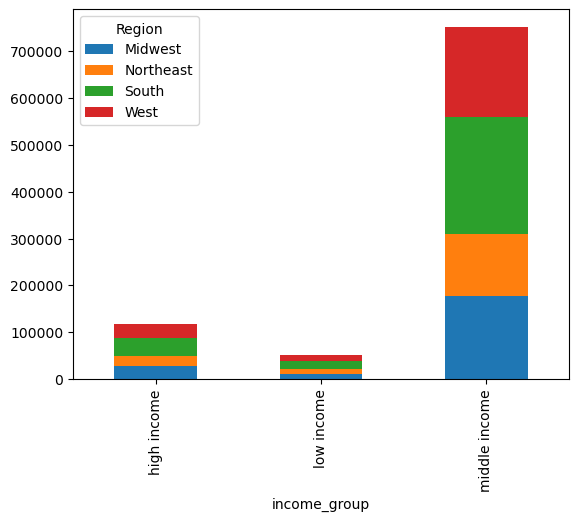

In [102]:
bar = income_region.plot(kind='bar', stacked =True)

In [103]:
region_freq = pd.crosstab(insta_data['frequency_flag'], insta_data['Region'], dropna = False)

In [104]:
region_freq

Region                 Midwest  Northeast   South    West
frequency_flag                                           
Frequent customer        28654      22883   42324   32751
Non-Frequent customer   121541      90623  174803  130783
Regular customer         65393      49485   89660   72370

In [105]:
region_freq.to_clipboard()

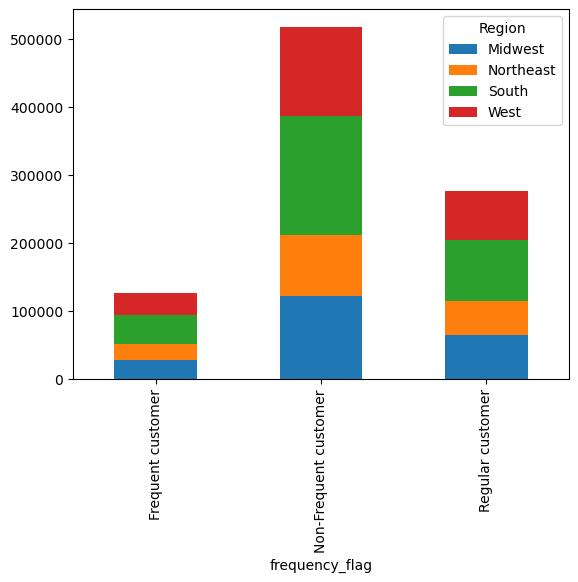

In [106]:
bar = region_freq.plot(kind='bar', stacked =True)

In [107]:
reorder_f = pd.crosstab(insta_data['department'], insta_data['reordered'], dropna = False)

In [108]:
reorder_f

reordered          0.0     1.0
department                    
alcohol           3338    4838
babies            7300   11436
bakery            4763    9815
beverages        27602   66897
breakfast        12509   17222
bulk              1417    1072
canned goods     30473   29960
dairy eggs       57324  150675
deli              8147   13113
dry goods pasta  15254   13362
frozen           42333   55597
household        23573   16915
international     8016    3947
meat seafood      6282    7154
missing            684     442
other              436     221
pantry           40322   22842
personal care     9468    5112
pets              1778    3149
produce          45578   67836
snacks           31265   41803

In [109]:
insta_data.groupby('department').agg({'reordered': ['mean']})

reordered
                     mean
department               
alcohol          0.591732
babies           0.610376
bakery           0.673275
beverages        0.707912
breakfast        0.579261
bulk             0.430695
canned goods     0.495756
dairy eggs       0.724403
deli             0.616792
dry goods pasta  0.466942
frozen           0.567722
household        0.417778
international    0.329934
meat seafood     0.532450
missing          0.392540
other            0.336377
pantry           0.361630
personal care    0.350617
pets             0.639131
produce          0.598127
snacks           0.572111

In [110]:
age_freq = pd.crosstab(insta_data['the_spender_flag'], insta_data['age_group'], dropna = False)

In [111]:
age_freq

age_group          Adult  Senior  Young Adult
the_spender_flag                             
High spender      286542  123766        60371
Low spender        97624   42478        20181
Spender           176577   77428        36303

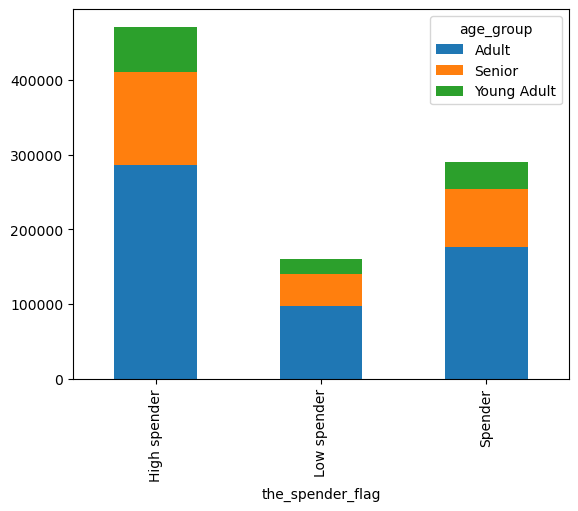

In [112]:
bar = age_freq.plot(kind='bar', stacked =True)

In [113]:
fam_freq = pd.crosstab(insta_data['the_spender_flag'], insta_data['fam_status'], dropna = False)

In [114]:
fam_freq

fam_status        divorced/widowed  living with parents and siblings  married  \
the_spender_flag                                                                
High spender                 40555                             23278   328104   
Low spender                  13890                              7418   112654   
Spender                      24172                             14054   204444   

fam_status        single  
the_spender_flag          
High spender       78742  
Low spender        26321  
Spender            47638

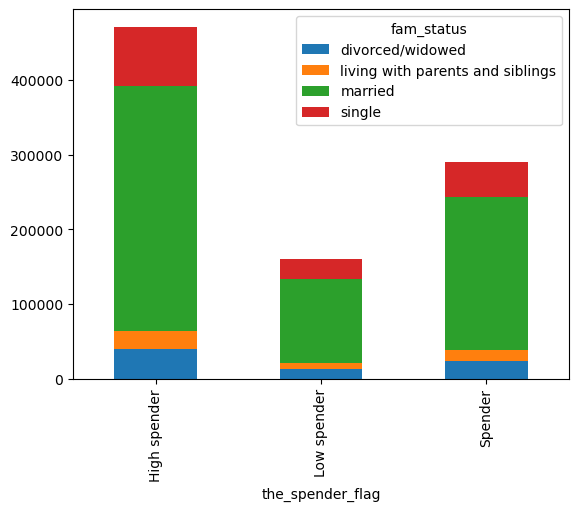

In [115]:
bar = fam_freq.plot(kind='bar', stacked =True)

In [119]:
age_region = pd.crosstab(insta_data['age_group'], insta_data['Region'], dropna = False)

In [120]:
age_region

Region       Midwest  Northeast   South    West
age_group                                      
Adult         131341      98777  186758  143867
Senior         56536      43946   80769   62421
Young Adult    27711      20268   39260   29616

In [121]:
age_region.to_clipboard()

In [122]:
fam_region = pd.crosstab(insta_data['fam_status'], insta_data['Region'], dropna = False)

In [123]:
fam_region

Region                            Midwest  Northeast   South    West
fam_status                                                          
divorced/widowed                    18122      14080   26188   20227
living with parents and siblings    10815       7287   15250   11398
married                            150382     114811  214364  165645
single                              36269      26813   50985   38634

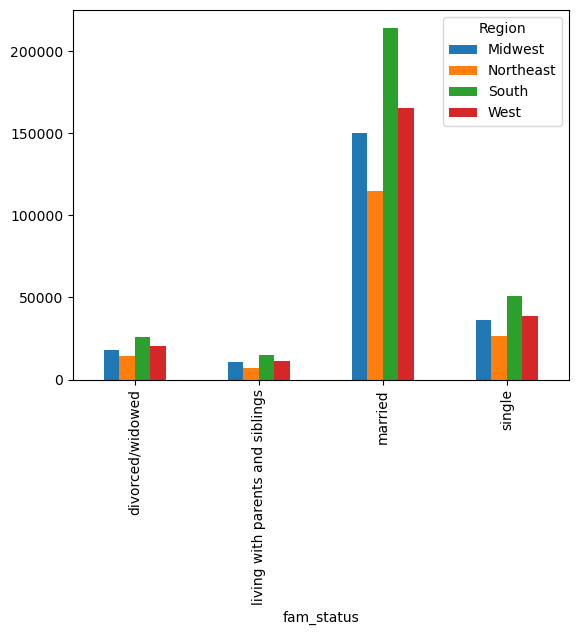

In [124]:
bar = fam_region.plot(kind='bar')

In [125]:
freq_region = pd.crosstab(insta_data['the_spender_flag'], insta_data['Region'], dropna = False)

In [126]:
freq_region

Region            Midwest  Northeast   South    West
the_spender_flag                                    
High spender       109819      84443  155273  121144
Low spender         37905      27693   53103   41582
Spender             67864      50855   98411   73178

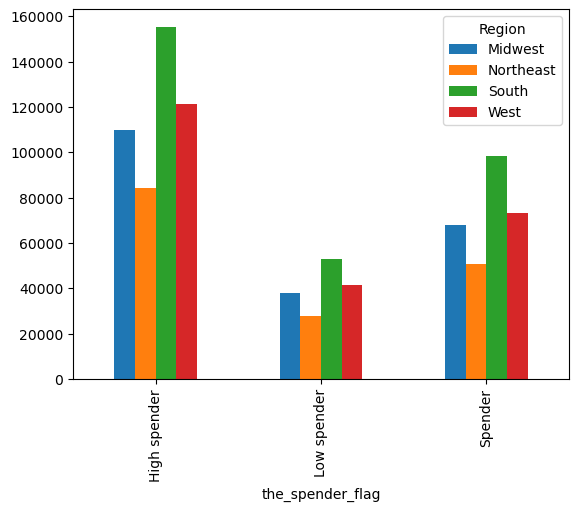

In [127]:
bar = freq_region.plot(kind='bar')